In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r'LEAD.csv')
data.head()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
0,1,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,1,1,2,0,0
3,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20742 entries, 0 to 20741
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OWN_HOUSE        20742 non-null  int64
 1   OWN_CAR          20742 non-null  int64
 2   HOUSE_LOAN       20742 non-null  int64
 3   CAR_LOAN         20742 non-null  int64
 4   SMOKER           20742 non-null  int64
 5   HEART_DISEASE    20742 non-null  int64
 6   DIABETES         20742 non-null  int64
 7   MARITAL_STATUS   20742 non-null  int64
 8   CHILDREN         20742 non-null  int64
 9   OTHER_INSURANCE  20742 non-null  int64
 10  PURCHASE         20742 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [6]:
data.describe()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
count,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000
mean,0.336033,0.166715,0.038521,0.037219,0.229968,0.034664,0.310722,0.955067,1.244673,0.280494,0.085768
std,0.472362,0.372730,0.192455,0.189303,0.420822,0.182932,0.462800,0.207162,0.696347,0.449251,0.280028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [7]:
data.PURCHASE.value_counts(normalize=True)

0    0.914232
1    0.085768
Name: PURCHASE, dtype: float64

Now, we need to check whether there is any missing value in the dataset or not. For that we will be using the following code.

In [8]:
data.isnull().sum(axis = 0)

OWN_HOUSE          0
OWN_CAR            0
HOUSE_LOAN         0
CAR_LOAN           0
SMOKER             0
HEART_DISEASE      0
DIABETES           0
MARITAL_STATUS     0
CHILDREN           0
OTHER_INSURANCE    0
PURCHASE           0
dtype: int64

In [9]:
X = data[['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE']]

y = data[['PURCHASE']]

In [10]:
y

,PURCHASE
0,1
1,0
2,0
3,0
4,0
...,...
20737,0
20738,0
20739,0
20740,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25, stratify=y)

Now we will be fitting the Decision Tree model on the training dataset for a depth of 3

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dectree = DecisionTreeClassifier(max_depth=3)
dectree_train = dectree.fit(X_train, y_train)
y_pred = dectree_train.predict(X_test)

In [62]:
test_pred = pd.DataFrame(np.hstack((X_test,y_test,y_pred.reshape(-1,1))),columns=['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE','y_test','y_pred'])
test_pred.head()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,y_test,y_pred
0,1,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,2,1,0,0
4,0,0,0,0,1,0,0,1,2,0,0,0


In [13]:
test_pred[['y_test','y_pred']].head(20)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision tree accuracy Score=",accuracy_score(y_test,y_pred)*100)

Decision tree accuracy Score= 91.38817480719794


In [15]:
prob = dectree_train.predict_proba(X_test)
prob

array([[1.        , 0.        ],
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341],
       ...,
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341]])

Suppose we get a new observation of a customer who does not:
1. own a house
2. have a heart disease
3. have any other insurance

and the customer has:
1. car
2. house loan
3. car loan
4. smoker
5. diabetes
6. married
7. one children

In [16]:
sample_df = pd.DataFrame([[0,1,1,1,1,0,1,1,1,0]],columns = ['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE'])
sample_df

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE
0,0,1,1,1,1,0,1,1,1,0


In [17]:
dectree_train.predict(sample_df)

array([0], dtype=int64)

for this customer, he is not going to purchase the item

In [18]:
dectree_train.predict_proba(sample_df)

array([[0.98349659, 0.01650341]])

The probability of making this claim is 98%

In [19]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2839    6]
 [ 262    5]]


## Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
clf = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(clf, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [22]:
dectree = DecisionTreeClassifier(max_depth=4, criterion='gini')
dectree_train = dectree.fit(X_train, y_train)
y_pred = dectree_train.predict(X_test)

In [23]:
print("Decision tree accuracy Score=",accuracy_score(y_test,y_pred)*100)

Decision tree accuracy Score= 91.4203084832905


In [25]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2842    3]
 [ 264    3]]


In [26]:
#Actually 0, but predicted as 0: TN
TN = cm[0,0]
print("True Negative: ",TN)

True Negative:  2842


In [27]:
#Actually 0, but predicted as 1 : FP
FP = cm[0,1]
print("False Positive: ",FP)

False Positive:  3


In [28]:
#Actually 1, but predicted as 0 : FN
FN = cm[1,0]
print("False Negative: ",FN)

False Negative:  264


In [29]:
#Actually 1, but predicted as 1 : TP
TP = cm[1,1]
print("True Positive: ",TP)

True Positive:  3


In [30]:
#Accuracy = Total Number of correct predictions/Total Number of observations
#orAccuracy = (TN+TP)/Total Number of observations
n=len(y_test)
(TN+TP)/n

0.9142030848329049

In [31]:
# recall orTPR or Sensitivity : TP/(TP+FN)
recall = TP/(TP+FN)
recall

0.011235955056179775

In [32]:
#Specificity : TN/(TN+FP)
specificity = TN/(TN+FP)
specificity

0.998945518453427

In [33]:
#FPR = 1-specificity or FP/(FP+TN)
FPR = 1-specificity
FPR

0.0010544815465729496

In [34]:
precision = TP/(TP+FP)
precision

0.5

In [35]:
from sklearn.metrics import f1_score,roc_curve,auc

In [36]:
f1_score(y_test,y_pred)

0.021978021978021976

In [37]:
(2*precision*recall)/(precision+recall)

0.021978021978021976

In [38]:
prob

array([[1.        , 0.        ],
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341],
       ...,
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341],
       [0.98349659, 0.01650341]])

In [39]:
prob_positive = prob[:,1]

In [40]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [41]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt.head()

,threshold,fpr,tpr
0,1.516129,0.000000,0.000000
1,0.516129,0.002109,0.018727
2,0.265794,0.177856,0.685393
3,0.097403,0.196485,0.696629
4,0.096375,0.258348,0.801498


In [42]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8190780856091572

In [43]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [44]:
roc_auc, fpr, tpr = compute_auc(X_test,dectree_train)
roc_auc

0.865231071003074

In [45]:
import matplotlib.pyplot as plt

In [46]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

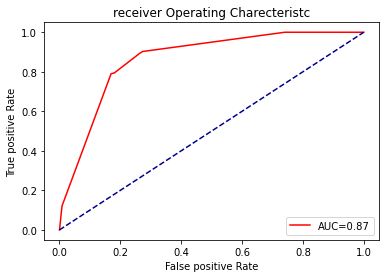

In [47]:
plot_ROC(roc_auc,fpr,tpr)

In this scenario :
- FP means a customer is actually not a prospective customer but the model predicted as a prospective customer - Type-1 error
- FN means a customer is actually a prospective customer but the model predicted it as not a prospective customer
since there exists a tradeoff between FN and FP

In order to, not to lose out on a prospective customer, False negatives are to be minimized with a marginal FP is acceptable.

Hence from the ROC curve choose that threshold which results in higher TPR which inturn minimizes the FN's

In [48]:
ftt

,threshold,fpr,tpr
0,1.516129,0.000000,0.000000
1,0.516129,0.002109,0.018727
2,0.265794,0.177856,0.685393
3,0.097403,0.196485,0.696629
4,0.096375,0.258348,0.801498
5,0.078036,0.361336,0.902622
6,0.016503,0.945518,1.000000
7,0.000000,1.000000,1.000000


In [49]:
new_pred = (prob_positive>0.105995).astype("int")
new_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
cm = confusion_matrix(y_test,new_pred)
cm

array([[2339,  506],
       [  84,  183]], dtype=int64)

Conslusion : With a modified threshold, we have achieved to reduce the False negative to a greater extent

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)
acc = accuracy_score(y_test,y_predict)
cm = confusion_matrix(y_test,y_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
print(acc)
print(cm)

0.9142030848329049
[[2827   18]
 [ 249   18]]


In [54]:
f1_score(y_test,y_predict)

0.11881188118811882

In [55]:
roc_auc,fpr,tpr = compute_auc(X_test,logreg)
roc_auc

0.8684754777091026

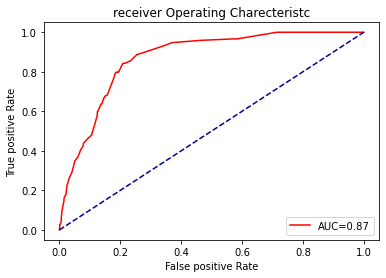

In [56]:
plot_ROC(roc_auc,fpr,tpr)